# Proyek Analisis Data: E-Commerce Public Dicoding
- Nama: Tuti Amalia
- Email: tutiamalia111@gmail.com
- Id Dicoding:

# Menentukan Pertanyaan Bisnis
- Pertanyaan 1: Apa saja kategori produk terlaris maupun yang kurang laris?
- Pertanyaan 2: Produk apa saja yang memiliki rata-rata skor review tertinggi dan terendah?
- Pertanyaan 3: Dimana state yang memiliki jumlah kostumer terbanyak?
- Pertanyaan 4: Bagaimana status pemesanannya?
- Pertanyaan 5: Berapa rata-rata payment value dari tiap tipe transaksi? Apa saja tipe pembayaran yang sering digunakan?
- Pertanyaan 6: Bagaimana tren pertumbuhan penjualan selama beberapa bulan terakhir? Bulan berapa yang memiliki penjualan tertinggi?
- Pertanyaan 7: Kapan waktu dan hari yang paling sering digunakan oleh pembeli untuk melakukan transaksi?

# Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling
## Gathering Data

In [3]:
# Mengambil data customer_dateset
customers_df = pd.read_csv('Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Mengambil data geolocation_dataset
geo_df = pd.read_csv('Dataset/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Mengambil data orders_dataset
orders_df = pd.read_csv('Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# Mengambil data order_items_dataset
order_item_df = pd.read_csv('Dataset/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Mengambil data order_payments_dataset
order_payment_df = pd.read_csv('Dataset/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# Mengambil data order_reviews_dataset
order_reviews_df = pd.read_csv('Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# Mengambil data products_dataset
products_df = pd.read_csv('Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# Mengambil data product_category_name_translation
product_category = pd.read_csv('Dataset/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
# Mengambil data sellers_dataset
sellers_df = pd.read_csv('Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assesing Data

### Menilai setiap tabel dataset

In [12]:
# mengecek setiap tabel 
check_all = [customers_df, geo_df, order_item_df, order_payment_df, 
             order_reviews_df, orders_df, product_category, products_df, sellers_df]

for df in check_all:
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f'Menilai Tabel: {df_name}')
    print('-' * 20)
    print('Info:')
    print(df.info())
    print('\nData Kosong:')
    print(df.isna().sum())
    print('\nData Duplikasi:')
    print(df.duplicated().sum())
    print('\nStatistik Deskriptif:')
    print(df.describe())
    print('\n')


Menilai Tabel: customers_df
--------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Data Kosong:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Data Duplikasi:
0

Statistik Deskriptif:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.

Pada Assessing Data dilakukan pengecekan tiap tabelnya yang mana pada:
- customer_df: tidak ada yang perlu di cleaning
- geo_df: terdapat duplikasi, namun dalam analisis tabel ini tidak digunakan
- **order_item_df**: kolom `shipping_limit_date` perlu diubah tipe datanya menjadi datetime
- order_payment_df: tidak ada yang perlu di cleaning
- **order_reviews_df**: `review_creation_date` dan `review_answer_timestamp` ubah jadi datetime. Terdapat missing value di kolom `review_comment_title` dan `review_comment_message`, karena tidak semua memberikan review skor berdasarkan rating 1-5 dan review tertulis.
- **orders_df**: `order_approved_at`, `order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date` masih type data object yang seharusnya datetime. Terdapat missing value pada `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`.
- product_category: tidak ada yang perlu di cleaning
- products_df: terdapat missing value pada semua kolomnya kecuali product_id
- sellers_df: tidak ada yang perlu di cleaning

## Cleaning Data

### orders_df

In [13]:
# memanggil kolom yang ingin diubah tipe datanya
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 
'order_estimated_delivery_date']

# mengubah kolom menjadi tipe data datetime
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [14]:
# missing value pada tabel orders_df
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [15]:
# mengisi nilai yg null menjadi nilai minimum dari kolom order_approvet_at
min_date = orders_df['order_approved_at'].min()
orders_df['order_approved_at'].fillna(min_date, inplace=True)
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### order_reviews_df

In [16]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [17]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [18]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [19]:
# mengisi data yg null dari kolom review_comment_title dan review_comment_message dengan masing-masing 'No Title' dan 'No Message'
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Message', inplace=True)
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Title,No Message,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Title,No Message,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Title,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Title,No Message,2018-07-01 00:00:00,2018-07-02 12:59:13


In [20]:
# memanggil kolom yang ingin diubah tipe datanya
datetime_columns_review = ['review_creation_date', 'review_answer_timestamp']

# mengubah kolom menjadi tipe data datetime
for column in datetime_columns_review:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

### order_payment_df

In [21]:
order_payment_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [22]:
order_payment_df['payment_type'] = order_payment_df['payment_type'].replace({'credit_card': 'Credit Card', 
                                                                             'boleto': 'Boleto',
                                                                             'voucher': 'Voucher',
                                                                             'debit_card': 'Debit Card',
                                                                             'not_defined': 'Not Defined'})
order_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,Boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,Credit Card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,Credit Card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,Credit Card,5,369.54


### order_item_df

In [23]:
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])

# Exploratory Data Analysis (EDA)
### customer_df

In [24]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [25]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Diketahui bahwa total kota di Brazil sebanyak 4119 kota yang mana mayoritas pembeli berasal dari kota `Sao Paulo` dan `Rio de Jeneiro`.

In [26]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

sebagian besar customer berasal dari state SP atau Sau Paulo

In [27]:
customer_id_in_orders_df = orders_df.customer_id.values
customers_df['status'] = customers_df['customer_id'].apply(lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [28]:
customers_df.groupby(by='status').customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

### order_item_df

In [29]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [30]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Pembelian dengan harga terkecil adalah R$ 0.85 dan yang terbesar R$ 6735

### order_payment_df

In [31]:
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45


In [32]:
order_payment_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
Credit Card    76505
Boleto         19784
Voucher         3866
Debit Card      1528
Not Defined        3
Name: order_id, dtype: int64

mayoritas customer membayar menggunakan credit card

### order_reviews_df

In [33]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Berdasarkan rata-rata skor penilaian sebesar 4.086 dan standar deviasi sebesar 1.347, yang mana customer merasa puas dengan barang yang mereka beli

In [35]:
order_reviews_df.groupby(by='review_score').review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

In [36]:
order_reviews_df.review_id.nunique()

98410

Dapat dilihat bahwa lebih dari setengah customer memberikan skor 5 yang berarti costumer sudah puas dengan barang yang mereka beli.

### orders_df

In [37]:
orders_df['delivery_time'] = (orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]).dt.days
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.strftime('%m-%Y')
orders_df['year'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y')


orders_df["order_day"] = orders_df["order_purchase_timestamp"].dt.strftime('%A')
orders_df['order_hour'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.hour)
hour_bins = [-0.1, 6, 12, 18, 23]
hour_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders_df['order_datetime'] = pd.cut(orders_df['order_hour'], hour_bins, labels=hour_labels)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,month,year,order_day,order_hour,order_datetime
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,10-2017,2017,Monday,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,07-2018,2018,Tuesday,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,08-2018,2018,Wednesday,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,11-2017,2017,Saturday,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,02-2018,2018,Tuesday,21,Night


### seller_df

In [38]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [39]:
sellers_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

Seller terbanyak berasal dari kota Sao Paulo

### product_df dan order_item_df

In [40]:
product_count_df = pd.merge(
    left=order_item_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

product_count_english_df = pd.merge(
    left=product_count_df,
    right=product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
product_count_english_df.groupby('product_category_name_english').order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               9417
health_beauty                8836
sports_leisure               7720
computers_accessories        6689
furniture_decor              6449
                             ... 
arts_and_craftmanship          23
la_cuisine                     13
cds_dvds_musicals              12
fashion_childrens_clothes       8
security_and_services           2
Name: order_id, Length: 71, dtype: int64

Terdapat 5 produk yang paling banyak diorder yakni:
1. bet_bath_table
2. health_beauty
3. sports_leisure
4. computers_accessories
5. furniture_decor

### order_payment_df dan order_df

In [41]:
total_revenue_df = pd.merge(
    left=orders_df,
    right=order_payment_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
total_revenue_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,month,year,order_day,order_hour,order_datetime,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,10-2017,2017,Monday,10,Morning,1.0,Credit Card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,10-2017,2017,Monday,10,Morning,3.0,Voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,10-2017,2017,Monday,10,Morning,2.0,Voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,07-2018,2018,Tuesday,20,Night,1.0,Boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,08-2018,2018,Wednesday,8,Morning,1.0,Credit Card,3.0,179.12


In [42]:
total_revenue_df['order_approved_at'] = total_revenue_df['order_approved_at'].dt.strftime('%Y-%m-%d')

In [43]:
# pendapatan per hari
revenue_by_day_df = total_revenue_df.groupby(by='order_approved_at').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
})
revenue_by_day_df.rename(columns={
    'order_id': 'total_order',
    'payment_value': 'total_revenue'
}, inplace=True)
revenue_by_day_df.reset_index(inplace=True)
revenue_by_day_df

# tidak mengambil data bulan 9 karena hanya ada 1 transaksi pada bulan tersebut
last_month = revenue_by_day_df['order_approved_at'].max()
months_to_remove = (revenue_by_day_df['order_approved_at'] == last_month)
revenue_by_day_df = revenue_by_day_df[~months_to_remove]

revenue_by_day_df

,order_approved_at,total_order,total_revenue
0,2016-09-15,161,37129.77
1,2016-10-04,20,2877.21
2,2016-10-05,11,2356.44
3,2016-10-06,110,20145.72
4,2016-10-07,59,12185.05
...,...,...,...
605,2018-08-25,81,10510.08
606,2018-08-26,70,11478.95
607,2018-08-27,64,6447.78
608,2018-08-28,56,5738.28


### order_reviews_df, order_item_df, dan product_df

In [44]:
order_item_review_df = pd.merge(
    left=order_reviews_df,
    right=order_item_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

items_in_english_df = pd.merge(
    left=products_df,
    right=product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [45]:
order_item_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [46]:
items_in_english_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [47]:
review_df = pd.merge(
    left=order_item_review_df,
    right=items_in_english_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools


In [48]:
review_count_df = review_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'review_score': 'mean'
}, inplace=True)

review_count_df.rename(columns={
    'order_id': 'total_order',
    'review_score': 'mean_review_score'
}, inplace=True)
review_count_df.sort_values(by='mean_review_score', ascending=False)

,total_order,mean_review_score
product_category_name_english,,
cds_dvds_musicals,12,4.642857
fashion_childrens_clothes,8,4.500000
books_general_interest,508,4.446266
costruction_tools_tools,94,4.444444
flowers,28,4.419355
...,...,...
fashion_male_clothing,111,3.641221
home_comfort_2,23,3.629630
office_furniture,1263,3.493183


Dari informasi di atas, diketahui bahwa item produk terbaik berdasarkan review tertinggi adalah cds_dvds_musicals dengan score review 4.6

In [49]:
review_price = review_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'price': ['min', 'max']
}, inplace=True)
review_price.rename(columns={'order_id':'total_order'}, inplace=True)


In [50]:
review_price.sort_values(by=('total_order', 'nunique'), ascending=False)

total_order   price         
                                  nunique     min      max
product_category_name_english                             
bed_bath_table                       9313    6.99  1999.98
health_beauty                        8771    1.20  3124.00
sports_leisure                       7669    4.50  4059.00
computers_accessories                6649    3.90  3699.99
furniture_decor                      6398    4.90  1899.00
...                                   ...     ...      ...
arts_and_craftmanship                  23    9.80   289.49
la_cuisine                             12   24.00   389.00
cds_dvds_musicals                      12   45.00    65.00
fashion_childrens_clothes               8   39.99   110.00
security_and_services                   2  100.00   183.29

[71 rows x 3 columns]

Berdasarkan total orderan, item produk yang paling sering diorder adalah bed_bath_table dengan range harga mulai dari 6.99 hingga 1999.98

# Visualization & Explanatory Analysis

### Pertanyaan 1: Apa saja kategori produk terlaris maupun yang kurang laris?

In [51]:
product_count_english_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [52]:
product_count_df = product_count_english_df.groupby(by='product_category_name_english')['product_id'].count().reset_index()
product_count_df = product_count_df.rename(columns={'product_id': 'products'})
product_count_df.head()

,product_category_name_english,products
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364


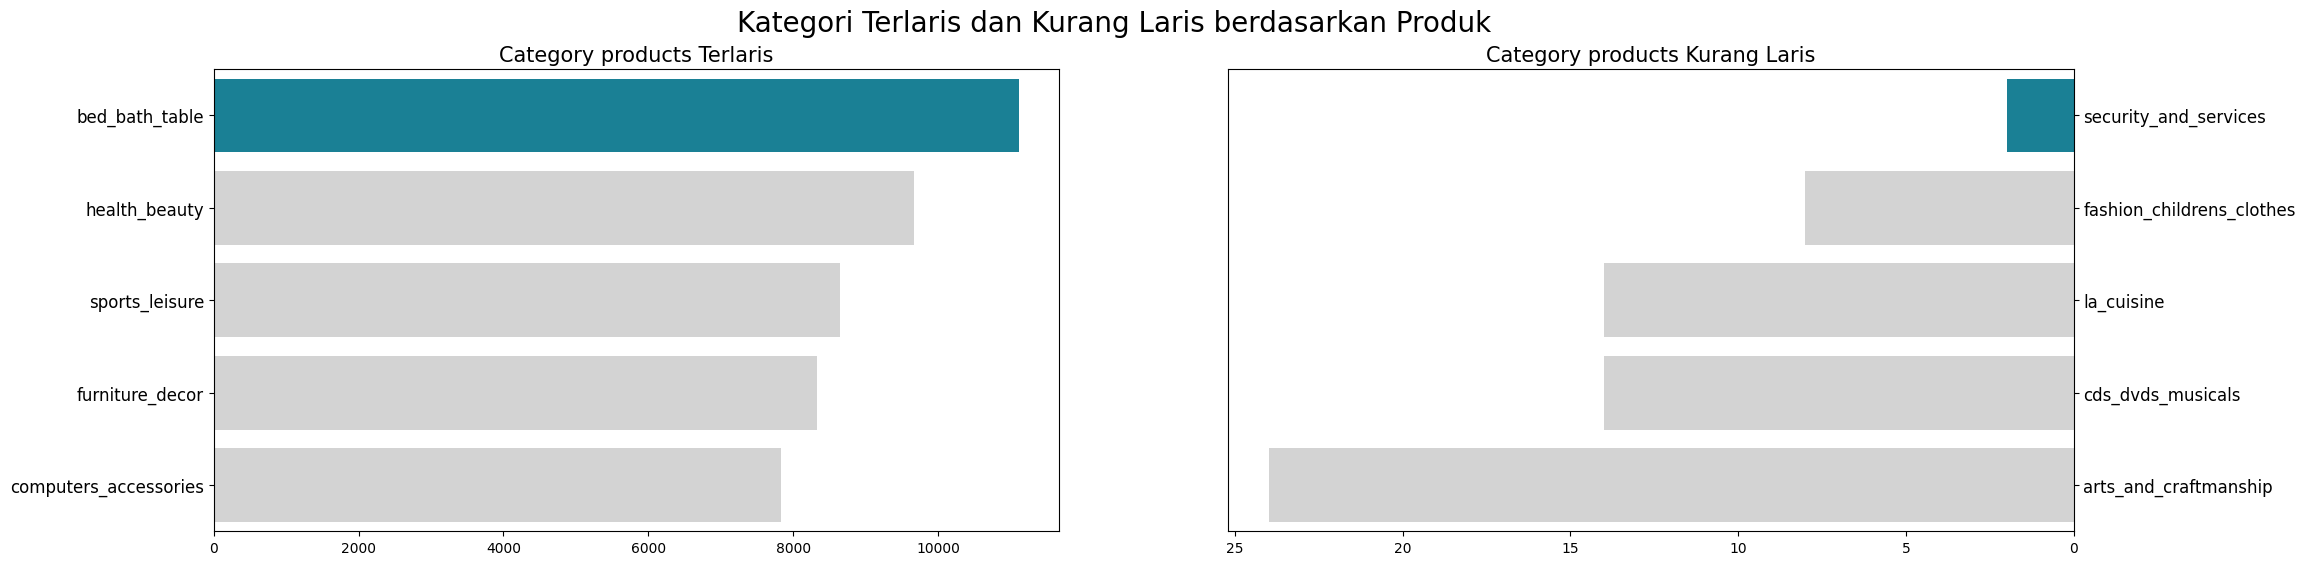

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='products', y='product_category_name_english', data=product_count_df.sort_values(by='products', ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('Category products Terlaris', loc='center', fontsize=15)
ax[0].tick_params(axis = 'y', labelsize=12)

sns.barplot(x='products', y='product_category_name_english', data=product_count_df.sort_values(by='products', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Category products Kurang Laris', loc='center', fontsize=15)
ax[1].tick_params(axis = 'y', labelsize=12)

plt.suptitle('Kategori Terlaris dan Kurang Laris berdasarkan Produk', fontsize=20)
plt.show()

### Pertanyaan 2: Produk apa saja yang memiliki rata-rata skor review tertinggi dan terendah?

In [54]:
review_product_count = review_count_df.reset_index()
review_product_count['mean_review_score'] = round(review_product_count['mean_review_score'],2)
review_product_count

,product_category_name_english,total_order,mean_review_score
0,agro_industry_and_commerce,182,4.00
1,air_conditioning,249,3.97
2,art,200,3.94
3,arts_and_craftmanship,23,4.12
4,audio,347,3.83
...,...,...,...
66,stationery,2295,4.19
67,tablets_printing_image,77,4.12
68,telephony,4168,3.95
69,toys,3853,4.16


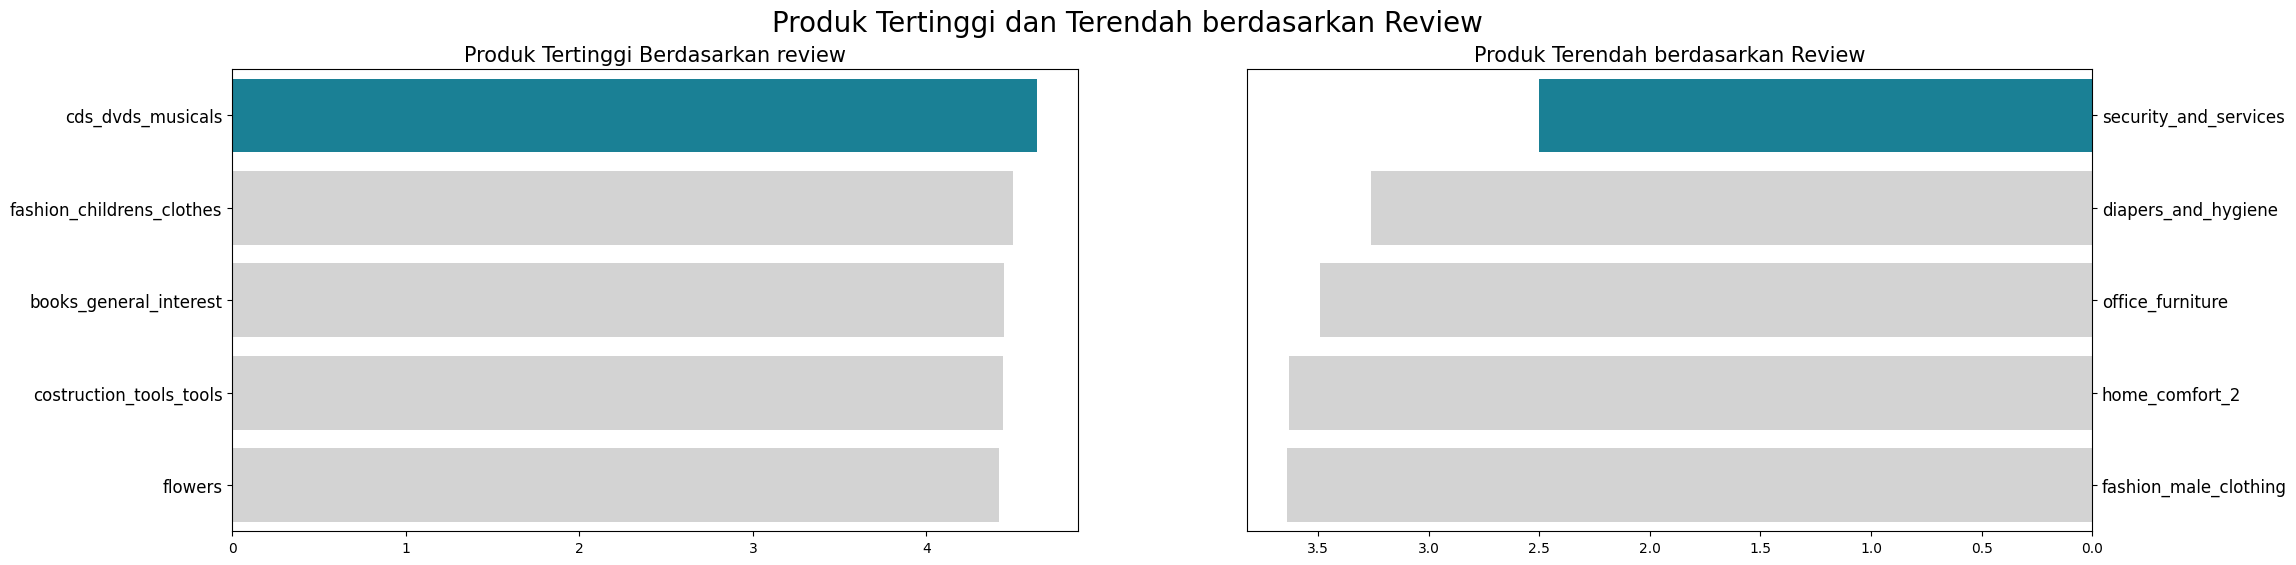

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='mean_review_score', y='product_category_name_english', data=review_product_count.sort_values(by='mean_review_score', ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title('Produk Tertinggi Berdasarkan review', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='mean_review_score', y='product_category_name_english', data=review_product_count.sort_values(by='mean_review_score', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Produk Terendah berdasarkan Review', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Produk Tertinggi dan Terendah berdasarkan Review ', fontsize=20)
plt.show()

### Pertanyaan 3: Dimana state yang memiliki jumlah kostumer terbanyak?

In [56]:
customer_state_count = customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index()
customer_state_count.head()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


In [57]:
most_common_state = customer_state_count.loc[customer_state_count['customer_id'].idxmax(), 'customer_state']

<function matplotlib.pyplot.show(close=None, block=None)>

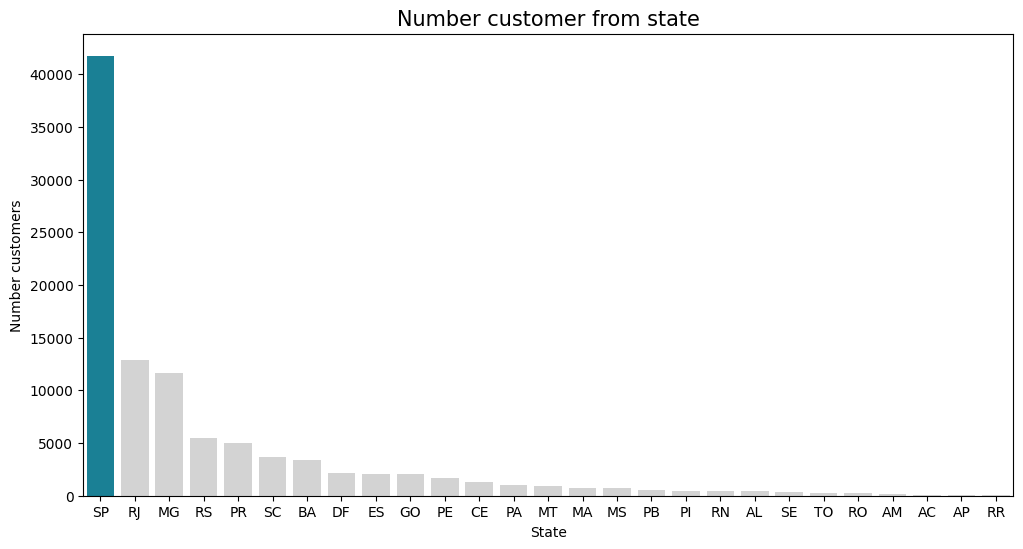

In [58]:
plt.figure(figsize=(12,6))

sns.barplot(x='customer_state', y='customer_id', data=customer_state_count, 
            palette=['#068DA9' if state == most_common_state else '#D3D3D3' for state in customer_state_count['customer_state']])
plt.title('Number customer from state', fontsize=15)
plt.xlabel('State')
plt.ylabel('Number customers')
plt.xticks(fontsize=10)
plt.show

### Pertanyaan 4: Bagaimana status pemesanannya?

In [59]:
total_revenue_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'month', 'year', 'order_day', 'order_hour',
       'order_datetime', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

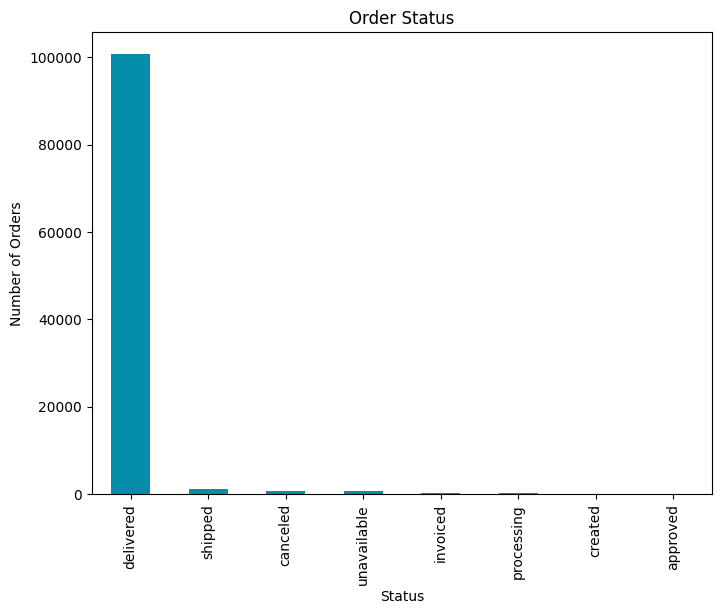

In [60]:
plt.figure(figsize=(8,6))
total_revenue_df.order_status.value_counts().plot(kind='bar', color='#068DA9')
plt.title('Order Status')
plt.ylabel('Number of Orders')
plt.xlabel('Status')
plt.show()

### Pertanyaan 5: Berapa rata-rata payment value dari tiap tipe transaksi? Apa saja tipe pembayaran yang sering digunakan?

In [61]:
order_payment_df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [62]:
mean_payment_value = order_payment_df.groupby(by='payment_type').payment_value.mean().reset_index()
mean_payment_value = mean_payment_value[mean_payment_value['payment_type'] != 'Not Defined'].sort_values(by='payment_value', ascending=False)
mean_payment_value

,payment_type,payment_value
1,Credit Card,163.319021
0,Boleto,145.034435
2,Debit Card,142.570170
4,Voucher,65.703354


In [63]:
order_payment_count = order_payment_df.groupby(by='payment_type').order_id.nunique().reset_index()
order_payment_count = order_payment_count[order_payment_count['payment_type'] != 'Not Defined'].sort_values(by='order_id', ascending=False)
order_payment_count

,payment_type,order_id
1,Credit Card,76505
0,Boleto,19784
4,Voucher,3866
2,Debit Card,1528


In [64]:
most_common_type = mean_payment_value.loc[mean_payment_value['payment_value'].idxmax(), 'payment_type']
most_common_type

'Credit Card'

<function matplotlib.pyplot.show(close=None, block=None)>

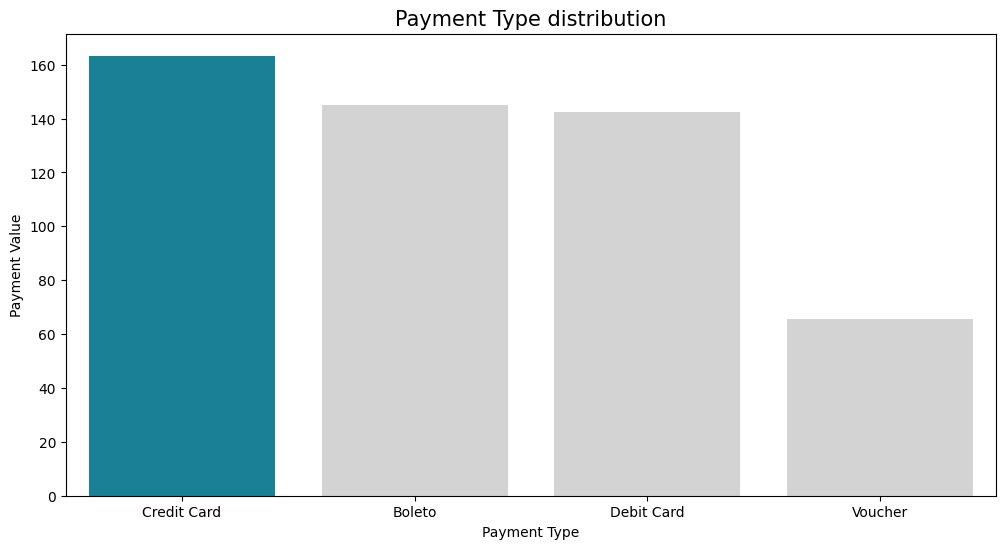

In [65]:
plt.figure(figsize=(12,6))

sns.barplot(x='payment_type', y='payment_value', data=mean_payment_value, 
            palette=['#068DA9' if type == most_common_type else '#D3D3D3' for type in mean_payment_value['payment_type']])
plt.title('Payment Type distribution', fontsize=15)
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.xticks(fontsize=10)
plt.show

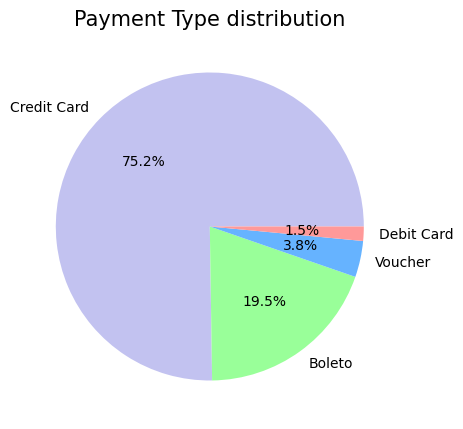

In [66]:
plt.figure(figsize=(5, 5))

# Use a list comprehension to create a list of colors based on the condition
colors = ['#c2c2f0', '#99ff99', '#66b3ff', '#ff9999']

plt.pie(order_payment_count['order_id'], labels=order_payment_count['payment_type'], colors=colors, autopct='%1.1f%%')
plt.title('Payment Type distribution', fontsize=15)
plt.show()

### Pertanyaan 6: Bagaimana tren pertumbuhan penjualan selama beberapa bulan terakhir? Bulan berapa yang memiliki penjualan tertinggi?

mulai bulan september 2016 hingga bulan oktober 2018

In [67]:
orders_date = orders_df.groupby(by='month').order_id.nunique().reset_index()
orders_date['month'] = pd.to_datetime(orders_date['month'])

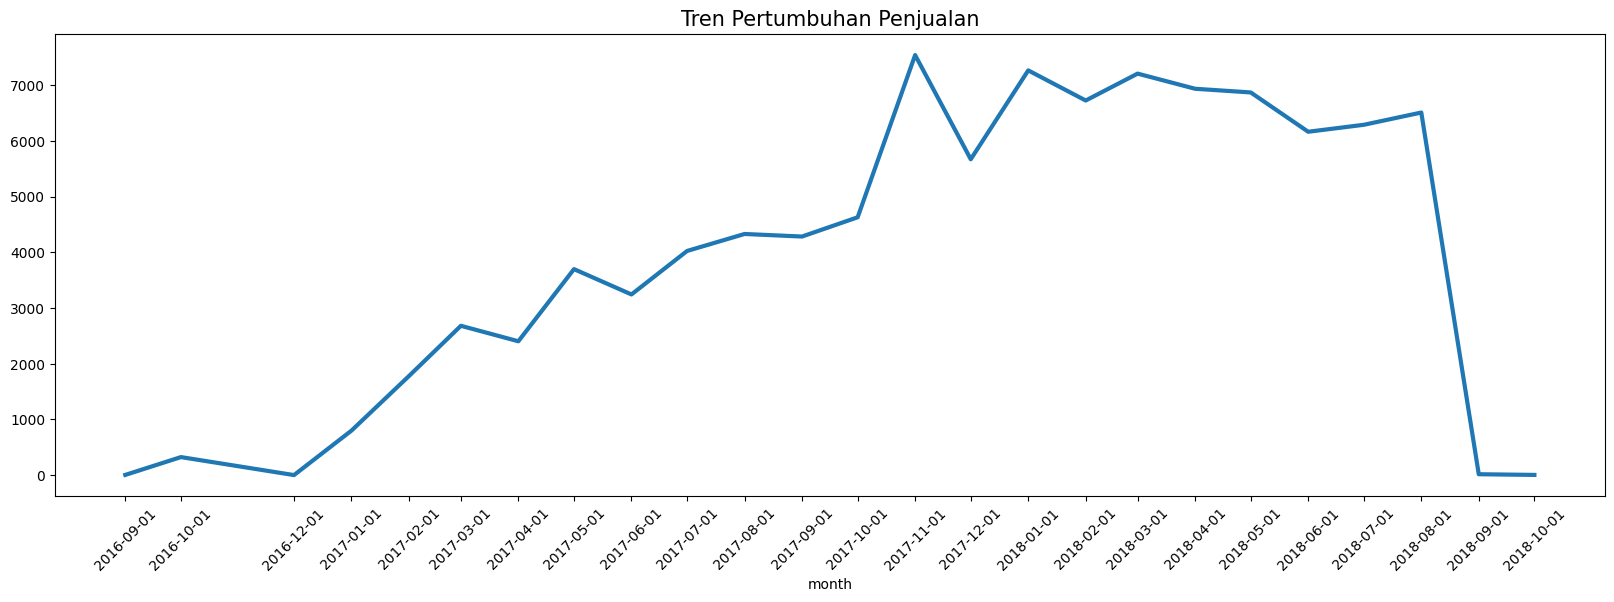

In [68]:
plt.figure(figsize=(20,6))

ax = sns.lineplot(x='month', y='order_id', data=orders_date, estimator=None, linewidth=3)
ax.set(xticks=orders_date.month.values)

plt.title("Tren Pertumbuhan Penjualan", loc='center', fontsize=15)
plt.ylabel('Total order')
plt.ylabel(None)
ax.grid(False)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Berdasarkan pada grafik di atas, penjualan tertinggi di bulan November 2017 di tanggal 24

In [69]:
get_nov_value = orders_df.loc[:, ['order_purchase_timestamp', 'order_id']]
get_nov_value['month'] = get_nov_value['order_purchase_timestamp'].dt.strftime('%m-%Y')
get_nov_value['day'] = get_nov_value['order_purchase_timestamp'].dt.strftime('%d')
nov_2017_data = get_nov_value[get_nov_value['month'] == '11-2017']
nov_2017_data.groupby(['day', 'month']).order_id.nunique().sort_values(ascending=False).head()
# get_nov_value.groupby('month').order_id.nunique()

day  month  
24   11-2017    1176
25   11-2017     499
27   11-2017     403
26   11-2017     391
28   11-2017     380
Name: order_id, dtype: int64

### Pertanyaan 7: Kapan waktu dan hari yang paling sering digunakan oleh pembeli untuk melakukan transaksi?

In [70]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'month', 'year', 'order_day', 'order_hour',
       'order_datetime'],
      dtype='object')

In [71]:
delivery_time_df = orders_df.groupby(by='order_datetime').order_id.nunique().reset_index()
delivery_time_df.rename(columns={'order_id': 'total_orders'}, inplace=True)

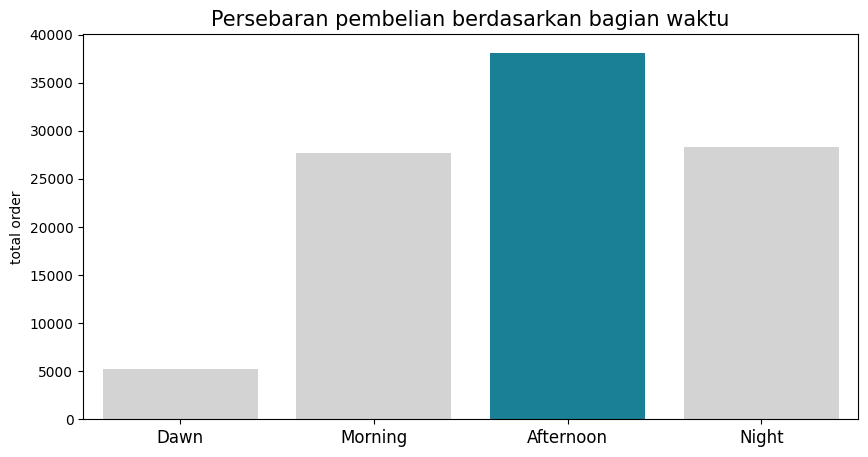

In [72]:
most_common_datetime = delivery_time_df.loc[delivery_time_df['total_orders'].idxmax(), 'order_datetime']
plt.figure(figsize=(10,5))

sns.barplot(x='order_datetime', y='total_orders', data=delivery_time_df, 
            palette=['#068DA9' if type == most_common_datetime else '#D3D3D3' for type in delivery_time_df['order_datetime']])
plt.title('Persebaran pembelian berdasarkan bagian waktu', loc='center', fontsize=15)
plt.ylabel('total order')
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [73]:
delivery_day_df = orders_df.groupby(by='order_day').order_id.nunique().sort_values(ascending=False).reset_index()
delivery_day_df.rename(columns={'order_id': 'total_orders'}, inplace=True)
delivery_day_df

,order_day,total_orders
0,Monday,16196
1,Tuesday,15963
2,Wednesday,15552
3,Thursday,14761
4,Friday,14122
5,Sunday,11960
6,Saturday,10887


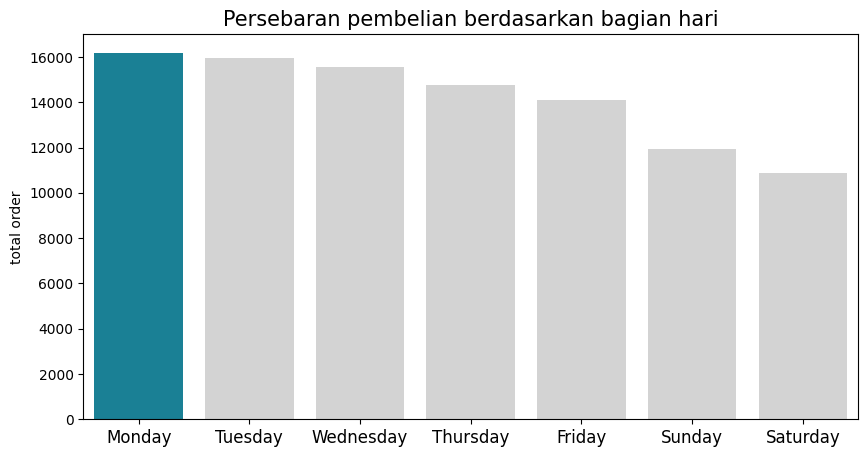

In [74]:
most_common_day = delivery_day_df.loc[delivery_day_df['total_orders'].idxmax(), 'order_day']

plt.figure(figsize=(10,5))

sns.barplot(x='order_day', y='total_orders', data=delivery_day_df, 
            palette=['#068DA9' if type == most_common_day else '#D3D3D3' for type in delivery_day_df['order_day']])
plt.title('Persebaran pembelian berdasarkan bagian hari', loc='center', fontsize=15)
plt.ylabel('total order')
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Conclusion

1. **Apa saja kategori produk terlaris maupun yang kurang laris?**
> Produk yang paling laris yakni kategori bed_bath_table sedangkan produk yang kurang laris yakni kategori security_and_service
2. **Produk apa saja yang memiliki rata-rata skor review tertinggi dan terendah?**
> Berdasarkan skor review dari pelanggan, produk yang memiliki review tertinggi yakni cds_dvds_musicals dengan rata-rata 4.64, sedangkan produk yang memiliki review terendah adalah security_and_services dengan rata-rata 2.5. 
3. **Dimana state yang memiliki jumlah kostumer terbanyak?**
> Berdasarkan grafiknya, state yang memiliki jumlah kostumer terbanyak adalah SP atau Sao Paulo dengan total kustomer sebanyak 41746.
4. **Bagaimana status pemesanannya?**
> Status pemesanan sudah banyak terkirim atau 'delivered' namun masih ada beberapa pemesanan masih dalam proses pengiriman, maupun yang sudah dibatalkan. 
5. **Berapa rata-rata payment value dari tiap tipe transaksi? Apa saja tipe pembayaran yang sering digunakan?**
> Tipe pembayaran credit card memiliki rata-rata pembayaran tertinggi yakni 163.3 sedangkan yang terendah tipe pembayarannya menggunakan voucher.  Adapun berdasarkan total orderan, pembeli kebanyakan juga menggunakan tipe pembayaran credit card dengan persentase 75.2%
6. **Bagaimana tren pertumbuhan penjualan selama beberapa bulan terakhir? Bulan berapa yang memiliki penjualan tertinggi?**
> Berdasarkan grafik tren pertumbuhan penjualan, terjadi peningkatan pada akhir tahun 2016 hingga di tahun 2017. Namun pada tahun 2018 terjadi penurunan penjualan. Bulan yang memiliki penjualan tertinggi ada di bulan November 2017.
7. **Kapan waktu dan hari yang paling sering digunakan oleh pembeli untuk melakukan transaksi?**
> Pembeli lebih banyak mengorder di waktu siang dibanding dengan waktu lain. Sedangkan hari yang paling sering adalah di hari Senin. Dapat dilihat juga rata-rata pembeli memilih hari weekday untuk order pesanan. 